<a href="https://colab.research.google.com/github/DS5500T9/Solar-Irradiance-Prediction/blob/main/Modelling/Model%201%20-%20Prophet/Prophet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#importing necessary libraries

import pandas as pd
import numpy as np
from datetime import datetime

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

from prophet import Prophet

#DATASET ANALYSIS

In [10]:
data = pd.read_csv("/content/drive/MyDrive/Numerical Dataset Curation/Meteorological_Data.csv")

In [ ]:
data.head(1)

,DATETIME,Avg BRBG Total Cloud Cover [%],Avg CDOC Total Cloud Cover [%],Avg CDOC Thick Cloud Cover [%],Avg CDOC Thin Cloud Cover [%],Avg Sun Flag,Avg HCF Value,Avg Blue/Red_min,Avg Blue/Red_mid,Avg Blue/Red_max,...,Avg Zenith Angle [degrees],Avg Azimuth Angle [degrees],Avg Solar Eclipse Shading,Avg Tower Dew Point Temp [deg C],Avg Total Cloud Cover [%],Avg Opaque Cloud Cover [%],Avg Avg Wind Speed @ 6ft [m/s],Avg Precipitation [mm],Avg Moisture,Avg Albedo (CMP11)
0,2021-10-08 07:00:00,13.6667,36.8333,0.0,36.8333,8.0,1.0367,0.9617,1.585,3.1533,...,85.6866,101.5014,0,-1.122,19.9667,10.4667,2.1028,0.0,0.0,0.2815


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8888 entries, 0 to 8887
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DATETIME                             8888 non-null   object 
 1   Avg BRBG Total Cloud Cover [%]       8888 non-null   float64
 2   Avg CDOC Total Cloud Cover [%]       8888 non-null   float64
 3   Avg CDOC Thick Cloud Cover [%]       8888 non-null   float64
 4   Avg CDOC Thin Cloud Cover [%]        8888 non-null   float64
 5   Avg Sun Flag                         8888 non-null   float64
 6   Avg HCF Value                        8888 non-null   float64
 7   Avg Blue/Red_min                     8888 non-null   float64
 8   Avg Blue/Red_mid                     8888 non-null   float64
 9   Avg Blue/Red_max                     8888 non-null   float64
 10  Avg File Extension                   8888 non-null   float64
 11  Avg Global CMP22 (vent/cor) [W

#PREPROCESSING

In [11]:
def preprocess_dataframe(df):
  """
  params:
  - df (dataframe): dataframe before preprocessing
  does:
  - Transform 'DATETIME' column from object to datetime format with renaming of column to timestamp.
  - Remove Outliers
  -Timestamp can be changed to index
  returns: Processed df (dataframe)
  """
  df['Timestamp'] = pd.to_datetime(df['DATETIME'])
  df.set_index('Timestamp', inplace=True) # set timestamp as index
  df=df.drop(['DATETIME', 'Avg Solar Eclipse Shading'], axis=1) # Remove null columns
  df = df[df["Avg CDOC Total Cloud Cover [%]"] !=-99999 ] # remove outliers
  return df

In [12]:
df=preprocess_dataframe(data)

#FEATURE SELECTION

###Random Forest Regressor

In [5]:
#Create X & Y
X = df.drop('Avg Global CMP22 (vent/cor) [W/m^2]', axis=1)
# Define the target variable
y = df['Avg Global CMP22 (vent/cor) [W/m^2]']

In [6]:
# Create a Random Forest Regressor
Feature = RandomForestRegressor(n_estimators=100, random_state=42)

In [7]:
#Train
Feature.fit(X, y)

RandomForestRegressor(random_state=42)

In [8]:
# Get feature importances
feature_importances = Feature.feature_importances_
# Get the names of the features
feature_names = X.columns
# Sort the feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]
#Printing the Features
print("Feature ranking:")
for i in range(len(sorted_idx)):
    print(f"{i + 1}. Feature '{feature_names[sorted_idx[i]]}' ({feature_importances[sorted_idx[i]]})")

Feature ranking:
1. Feature 'Avg Zenith Angle [degrees]' (0.711676853954419)
2. Feature 'Avg Sun Flag' (0.19765764914799114)
3. Feature 'Avg Opaque Cloud Cover [%]' (0.026599596252951132)
4. Feature 'Avg Blue/Red_min' (0.023433460938002023)
5. Feature 'Avg BRBG Total Cloud Cover [%]' (0.007625086897657689)
6. Feature 'Avg Albedo (CMP11)' (0.005119917021154582)
7. Feature 'Avg Tower Dew Point Temp [deg C]' (0.0048628996228067736)
8. Feature 'Avg Total Cloud Cover [%]' (0.004115140587297173)
9. Feature 'Avg Azimuth Angle [degrees]' (0.003259371051480165)
10. Feature 'Avg Moisture' (0.0025836758806117186)
11. Feature 'Avg CDOC Total Cloud Cover [%]' (0.0023181755437306213)
12. Feature 'Avg Avg Wind Speed @ 6ft [m/s]' (0.0020149559570444638)
13. Feature 'Avg Blue/Red_mid' (0.002006201686007651)
14. Feature 'Avg Blue/Red_max' (0.0018984342275792418)
15. Feature 'Avg CDOC Thin Cloud Cover [%]' (0.0017791712973268753)
16. Feature 'Avg HCF Value' (0.001585757949694675)
17. Feature 'Avg CDOC Th

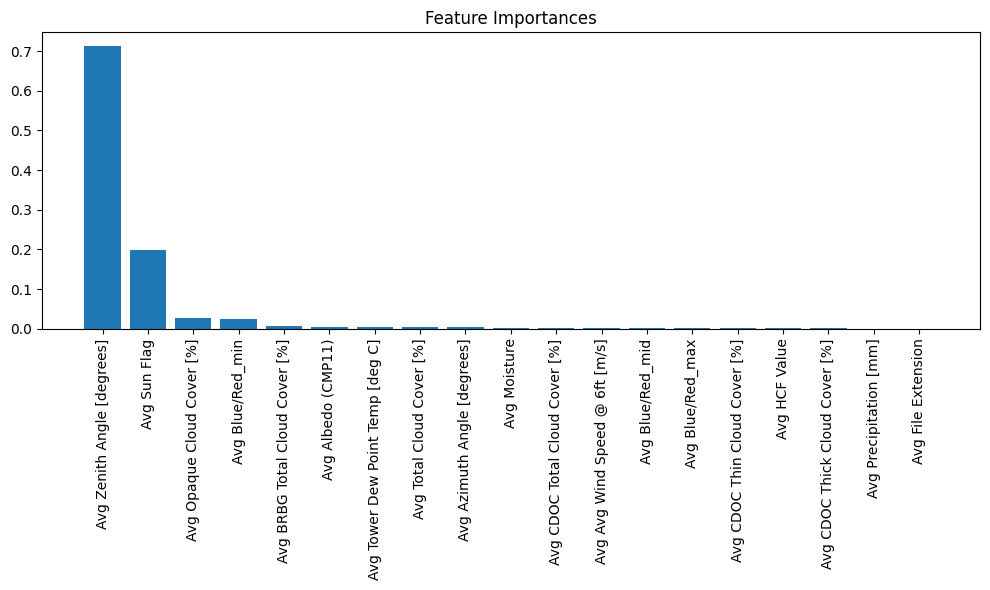

In [9]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(sorted_idx)), feature_names[sorted_idx], rotation=90)  # Added a closing parenthesis here
plt.tight_layout()
plt.show()

# Selecting Features based on above and Modeling

In [6]:
#Selecting certain columns and dropping the rest
cols_to_keep = ['Avg Zenith Angle [degrees]','Avg Sun Flag','Avg Opaque Cloud Cover [%]','Avg Blue/Red_min','Avg Global CMP22 (vent/cor) [W/m^2]']
#data_df=X.loc[:, cols_to_keep]
data_df=df.loc[:, cols_to_keep]

In [13]:
cols_to_keep = ['Avg Zenith Angle [degrees]','Avg Sun Flag','Avg Opaque Cloud Cover [%]','Avg Blue/Red_min','Avg Global CMP22 (vent/cor) [W/m^2]','Avg BRBG Total Cloud Cover [%]','Avg Azimuth Angle [degrees]','Avg Albedo (CMP11)','Avg Tower Dew Point Temp [deg C]','Avg Total Cloud Cover [%]']
data_df=df.loc[:, cols_to_keep]

In [7]:
data_df.head()

,Avg Zenith Angle [degrees],Avg Sun Flag,Avg Opaque Cloud Cover [%],Avg Blue/Red_min,Avg Global CMP22 (vent/cor) [W/m^2]
Timestamp,,,,,
2021-10-08 07:00:00,85.6866,8.0,10.4667,0.9617,63.8407
2021-10-08 08:00:00,74.7881,3.5,47.8667,0.9333,176.1522
2021-10-08 09:00:00,64.6156,3.0,77.2333,0.9267,361.7695
2021-10-08 10:00:00,55.8601,3.0,39.2167,0.9367,582.2481
2021-10-08 11:00:00,49.3991,3.0,69.2000,0.9850,632.4995


In [17]:
data_df = data_df.reset_index()

In [18]:
data_df = data_df.rename(columns={"Timestamp": "ds", "Avg Global CMP22 (vent/cor) [W/m^2]": "y"})

In [19]:
data_df.head(1)

,ds,Avg Zenith Angle [degrees],Avg Sun Flag,Avg Opaque Cloud Cover [%],Avg Blue/Red_min,y,Avg BRBG Total Cloud Cover [%],Avg Azimuth Angle [degrees],Avg Albedo (CMP11),Avg Tower Dew Point Temp [deg C],Avg Total Cloud Cover [%]
0,2021-10-08 07:00:00,85.6866,8.0,10.4667,0.9617,63.8407,13.6667,101.5014,0.2815,-1.122,19.9667


In [11]:
#TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(data_df):
    train = data_df.iloc[train_index]
    valid = data_df.iloc[test_index]

In [16]:
#initialize the model
model = Prophet(
    seasonality_mode='multiplicative',
    seasonality_prior_scale=0.1
)

In [17]:
model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm2p1mk24/0vfpho8y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm2p1mk24/v2hx71sp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38077', 'data', 'file=/tmp/tmpm2p1mk24/0vfpho8y.json', 'init=/tmp/tmpm2p1mk24/v2hx71sp.json', 'output', 'file=/tmp/tmpm2p1mk24/prophet_modelary0jxe6/prophet_model-20231022193354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:33:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:33:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [18]:
valid.head()

,ds,Avg Zenith Angle [degrees],Avg Sun Flag,Avg Opaque Cloud Cover [%],Avg Blue/Red_min,y
7324,2023-06-27 19:00:00,80.0444,6.6667,6.8500,0.8967,122.0784
7325,2023-06-27 20:00:00,90.2606,8.0000,0.0333,0.8583,10.1054
7326,2023-06-28 05:00:00,91.4115,8.0000,-0.7167,0.9017,4.3003
7327,2023-06-28 06:00:00,81.2640,5.8333,12.6333,0.9750,96.4975
7328,2023-06-28 07:00:00,70.4254,5.0000,12.3500,0.9867,287.7524


In [19]:
forecast = model.predict(valid)

In [20]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2023-06-27 19:00:00,14.512129,-192.752679,226.146049
1,2023-06-27 20:00:00,5.096893,-190.748594,220.717555
2,2023-06-28 05:00:00,9.228853,-171.802605,214.811855
3,2023-06-28 06:00:00,19.512973,-177.560082,225.788018
4,2023-06-28 07:00:00,109.632503,-91.574175,326.935273


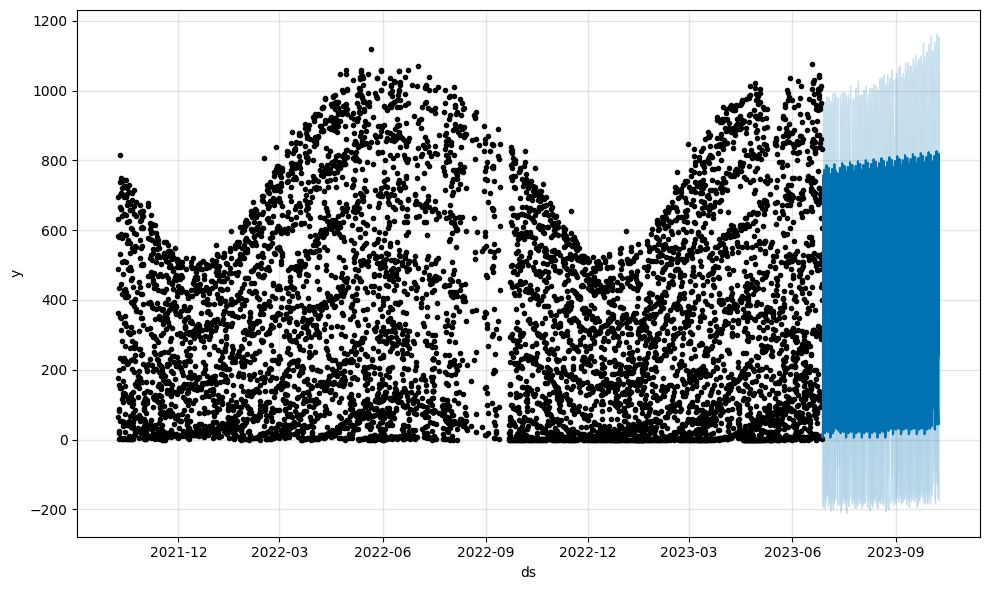

In [21]:
fig = model.plot(forecast)

#EVALUATION

In [22]:
forecasted_values = forecast[['ds', 'yhat']]

In [23]:
forecasted_values.rename(columns={'ds': 'ds', 'yhat': 'forecasted_y'}, inplace=True)

<ipython-input-23-9280924d442f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_values.rename(columns={'ds': 'ds', 'yhat': 'forecasted_y'}, inplace=True)


In [24]:
merged_df = pd.merge(valid, forecasted_values, on='ds', how='inner')

In [25]:
merged_df.head()

,ds,Avg Zenith Angle [degrees],Avg Sun Flag,Avg Opaque Cloud Cover [%],Avg Blue/Red_min,y,forecasted_y
0,2023-06-27 19:00:00,80.0444,6.6667,6.8500,0.8967,122.0784,14.512129
1,2023-06-27 20:00:00,90.2606,8.0000,0.0333,0.8583,10.1054,5.096893
2,2023-06-28 05:00:00,91.4115,8.0000,-0.7167,0.9017,4.3003,9.228853
3,2023-06-28 06:00:00,81.2640,5.8333,12.6333,0.9750,96.4975,19.512973
4,2023-06-28 07:00:00,70.4254,5.0000,12.3500,0.9867,287.7524,109.632503


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate evaluation metrics
y_true = merged_df['y']
y_pred = merged_df['forecasted_y']

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 226.6331336745059
Mean Squared Error (MSE): 102256.06657451602
Root Mean Squared Error (RMSE): 319.7750249386528


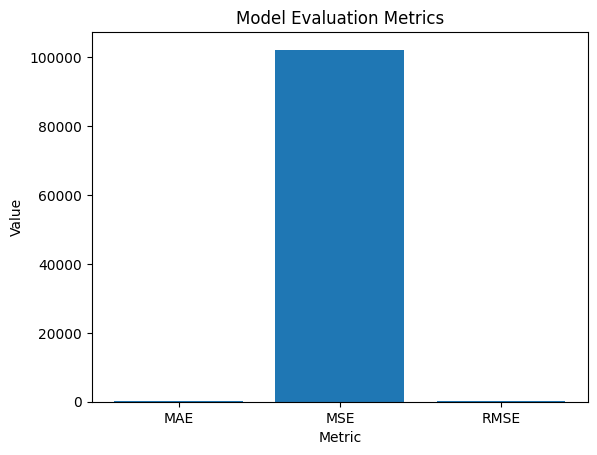

In [27]:
import matplotlib.pyplot as plt

# Create a bar plot of evaluation metrics
metrics = ['MAE', 'MSE', 'RMSE']
values = [mae, mse, rmse]

plt.bar(metrics, values)
plt.title('Model Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

#Modelling 2

```
# This is formatted as code
```



In [1]:
from prophet import Prophet
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

In [31]:
m = Prophet(interval_width=0.95) #by default is 80%
model2 = m.fit(data_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp8piwcd06/_8kyhflb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8piwcd06/yvyahccl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84436', 'data', 'file=/tmp/tmp8piwcd06/_8kyhflb.json', 'init=/tmp/tmp8piwcd06/yvyahccl.json', 'output', 'file=/tmp/tmp8piwcd06/prophet_model7nf10sh4/prophet_model-20231023015652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:56:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:56:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
future12=m.make_future_dataframe(periods=90)
future12.head()

,ds
0,2021-10-08 07:00:00
1,2021-10-08 08:00:00
2,2021-10-08 09:00:00
3,2021-10-08 10:00:00
4,2021-10-08 11:00:00


In [34]:
forecast12=m.predict(future12)

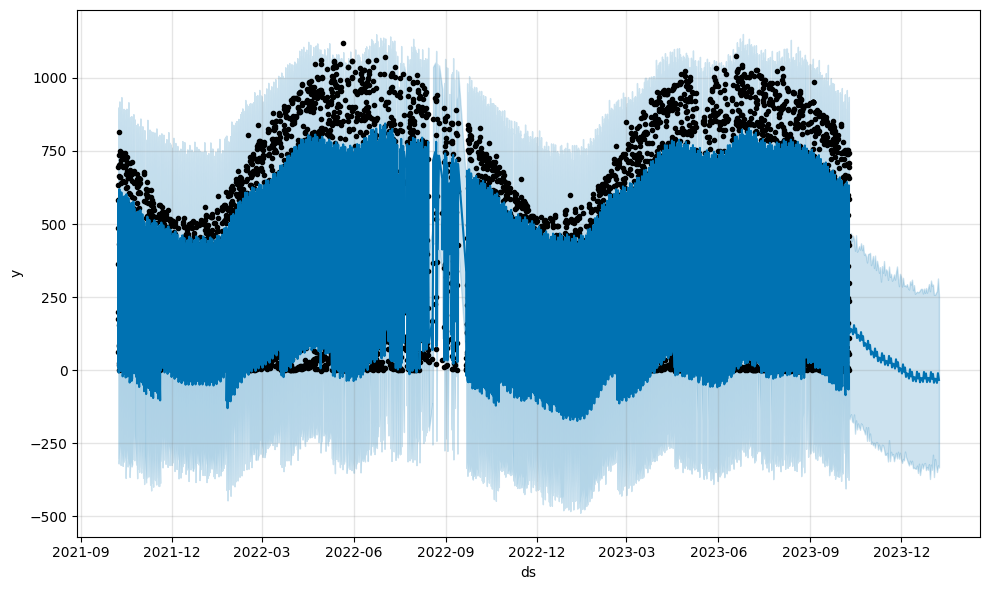

In [35]:
plot1 = m.plot(forecast12)

Deep blue line is forecast sales forecast['y_hat'], black dots are actual sales forecast['y']. The light blue shade is 95% confidence interval around the forecast. The uncertainty interval in this region is bounded by forecast['yhat_lower'] and forecast['yhat_upper'] values.

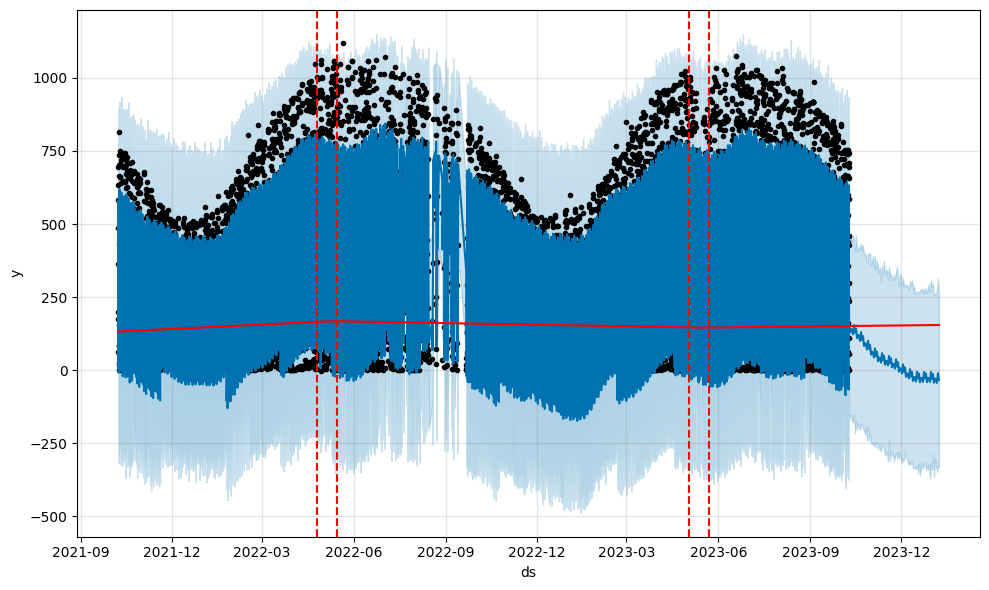

In [36]:
from prophet.plot import add_changepoints_to_plot

plot1 = m.plot(forecast12)
a = add_changepoints_to_plot(plot1.gca(),m,forecast12)

#Component Plots

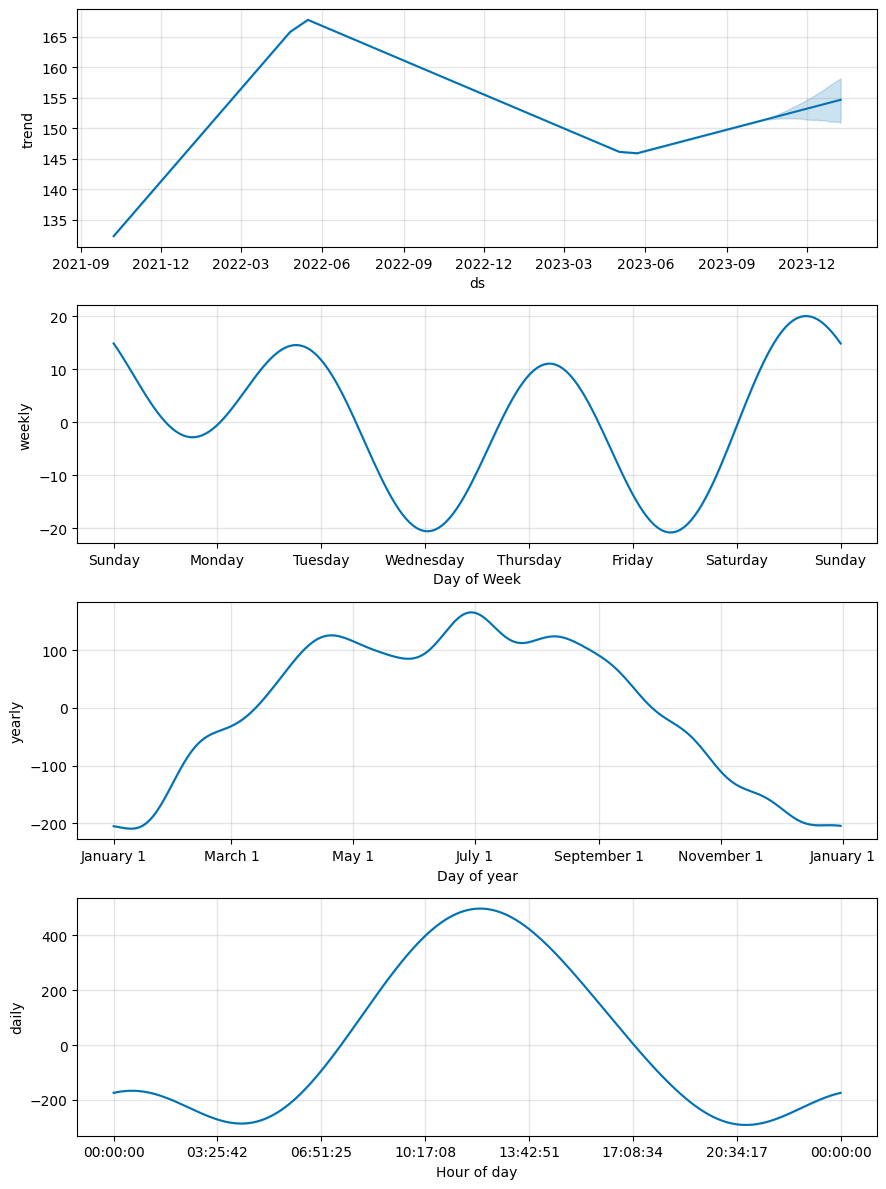

In [37]:
plot2 = m.plot_components(forecast12)

#Evaluate model

In [41]:
df_merge12 = pd.merge(data_df, forecast12[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge12 = df_merge12[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge12.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2021-10-08 07:00:00,-297.971449,318.438759,11.879552,63.8407
1,2021-10-08 08:00:00,-152.613150,461.683705,161.761311,176.1522
2,2021-10-08 09:00:00,11.649160,608.206946,316.265671,361.7695
3,2021-10-08 10:00:00,134.315204,746.921450,451.434997,582.2481
4,2021-10-08 11:00:00,242.250826,840.115617,545.602838,632.4995


In [42]:
from sklearn.metrics import mean_absolute_error
# calculate MAE between observed and predicted values
y_true = df_merge12['y'].values
y_pred = df_merge12['yhat'].values
mae_01 = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae_01)

MAE: 115.596


In [43]:
from sklearn.metrics import mean_absolute_percentage_error

mape_01 = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: %.3f' % mape_01)

MAPE: 10.998


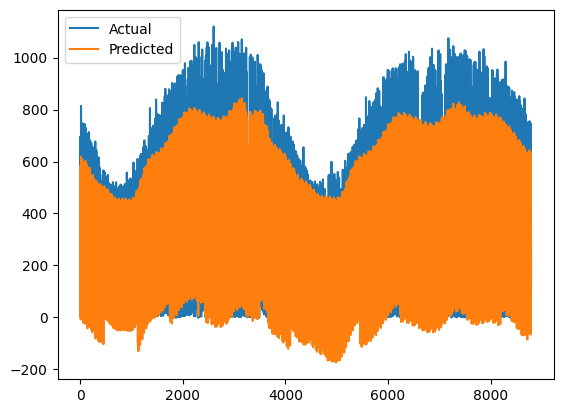

In [44]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

#Cross Validation

In [45]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon='90 days')
# df_cv = cross_validation(m, initial='270 days', period='45 days', horizon = '90 days')
df_cv.head()

INFO:prophet:Making 7 forecasts with cutoffs between 2022-10-14 17:00:00 and 2023-07-11 17:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp8piwcd06/8b0e_07o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8piwcd06/8kefgx0t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84792', 'data', 'file=/tmp/tmp8piwcd06/8b0e_07o.json', 'init=/tmp/tmp8piwcd06/8kefgx0t.json', 'output', 'file=/tmp/tmp8piwcd06/prophet_models4ov4m7l/prophet_model-20231023020418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:04:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:04:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8piwcd06/p_tksm97.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8piwcd06/m1cgrz5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-10-14 18:00:00,23.945777,-280.905070,320.858396,3.5493,2022-10-14 17:00:00
1,2022-10-15 06:00:00,-69.337205,-371.444727,242.280670,-0.6707,2022-10-14 17:00:00
2,2022-10-15 07:00:00,62.562884,-238.477997,359.156848,44.1310,2022-10-14 17:00:00
3,2022-10-15 08:00:00,220.788217,-80.061796,526.047157,216.3967,2022-10-14 17:00:00
4,2022-10-15 09:00:00,377.853518,55.420098,676.996335,405.5138,2022-10-14 17:00:00


In [46]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days 01:00:00,28317.058814,168.276733,122.547371,18.022056,0.364209,0.669522,0.902238
1,9 days 02:00:00,28319.818038,168.284931,122.601328,18.042416,0.365621,0.671740,0.902238
2,9 days 03:00:00,28318.088233,168.279792,122.593273,18.146140,0.365621,0.672596,0.902238
3,9 days 12:00:00,28298.959487,168.222946,122.459234,18.153910,0.365621,0.673586,0.902238
4,9 days 13:00:00,28286.983880,168.187348,122.465941,18.111870,0.365621,0.675148,0.902238


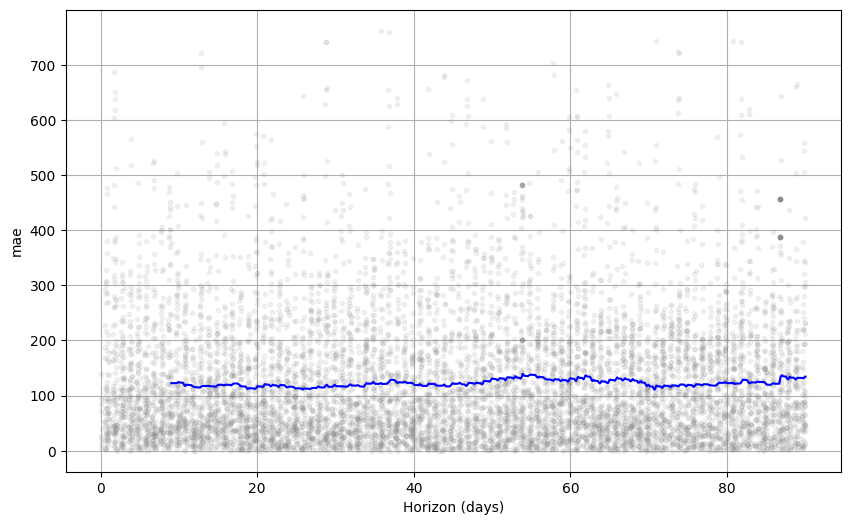

In [47]:
from prophet.plot import plot_cross_validation_metric

plot3 = plot_cross_validation_metric(df_cv, metric='mae')

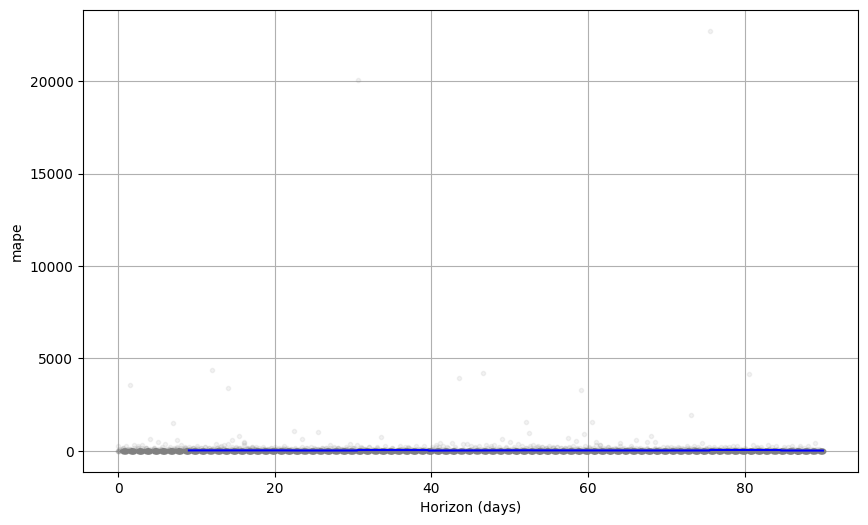

In [48]:
plot4 = plot_cross_validation_metric(df_cv, metric='mape')

In [49]:
# Python
import itertools

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
maes = []  # Store the MAE for each params here
mapes = [] # Store the MAPE for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(data_df)  # Fit model with given params
    df_cv = cross_validation(m, horizon='90 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    maes.append(df_p['mae'].values[0])
    mapes.append(df_p['mape'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = maes
tuning_results['mape'] = mapes

DEBUG:cmdstanpy:input tempfile: /tmp/tmp8piwcd06/7ipxec4o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8piwcd06/putg33z6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9264', 'data', 'file=/tmp/tmp8piwcd06/7ipxec4o.json', 'init=/tmp/tmp8piwcd06/putg33z6.json', 'output', 'file=/tmp/tmp8piwcd06/prophet_modelgh417mty/prophet_model-20231023021623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:16:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:16:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 7 forecasts with cutoffs between 2022-10-14 17:00:00 and 2023-07-11 17:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79e8bbe3bdc0>
DEBUG:cmdstanpy:input tempfile: /

In [50]:
tuning_results_df = pd.DataFrame(tuning_results)

In [51]:
tuning_results_df.sort_values(['mae','mape'])

,changepoint_prior_scale,seasonality_prior_scale,mae,mape
7,0.010,10.00,120.576085,18.938247
6,0.010,1.00,120.595435,19.089612
5,0.010,0.10,120.603086,18.854591
3,0.001,10.00,122.182093,17.586179
1,0.001,0.10,122.718468,18.082579
2,0.001,1.00,123.786726,17.550897
10,0.100,1.00,123.924383,19.841231
9,0.100,0.10,124.050074,20.047032
11,0.100,10.00,124.133669,19.557469
14,0.500,1.00,129.050729,24.079128


In [52]:
tuning_results_df.sort_values(['mape','mae'])

,changepoint_prior_scale,seasonality_prior_scale,mae,mape
2,0.001,1.00,123.786726,17.550897
3,0.001,10.00,122.182093,17.586179
1,0.001,0.10,122.718468,18.082579
5,0.010,0.10,120.603086,18.854591
7,0.010,10.00,120.576085,18.938247
6,0.010,1.00,120.595435,19.089612
11,0.100,10.00,124.133669,19.557469
10,0.100,1.00,123.924383,19.841231
9,0.100,0.10,124.050074,20.047032
14,0.500,1.00,129.050729,24.079128


In [53]:
best_params = all_params[np.argmin(mapes)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0}


#Model

In [54]:
m = Prophet(interval_width=0.95, weekly_seasonality=True,
            changepoint_prior_scale=best_params['changepoint_prior_scale'],
            seasonality_prior_scale=best_params['seasonality_prior_scale'])
model = m.fit(data_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp8piwcd06/36ywb5q0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8piwcd06/0rwkf2rq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58577', 'data', 'file=/tmp/tmp8piwcd06/36ywb5q0.json', 'init=/tmp/tmp8piwcd06/0rwkf2rq.json', 'output', 'file=/tmp/tmp8piwcd06/prophet_modeli1o0mii9/prophet_model-20231023022700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:27:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:27:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [55]:
future = m.make_future_dataframe(periods=90)

In [56]:
forecast = m.predict(future)

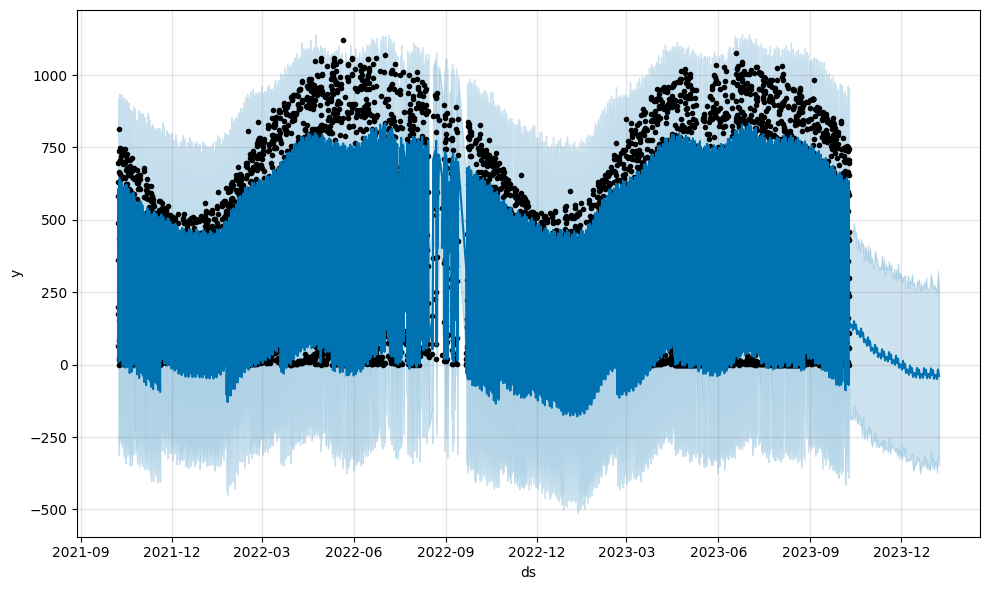

In [57]:
plot5 = m.plot(forecast)

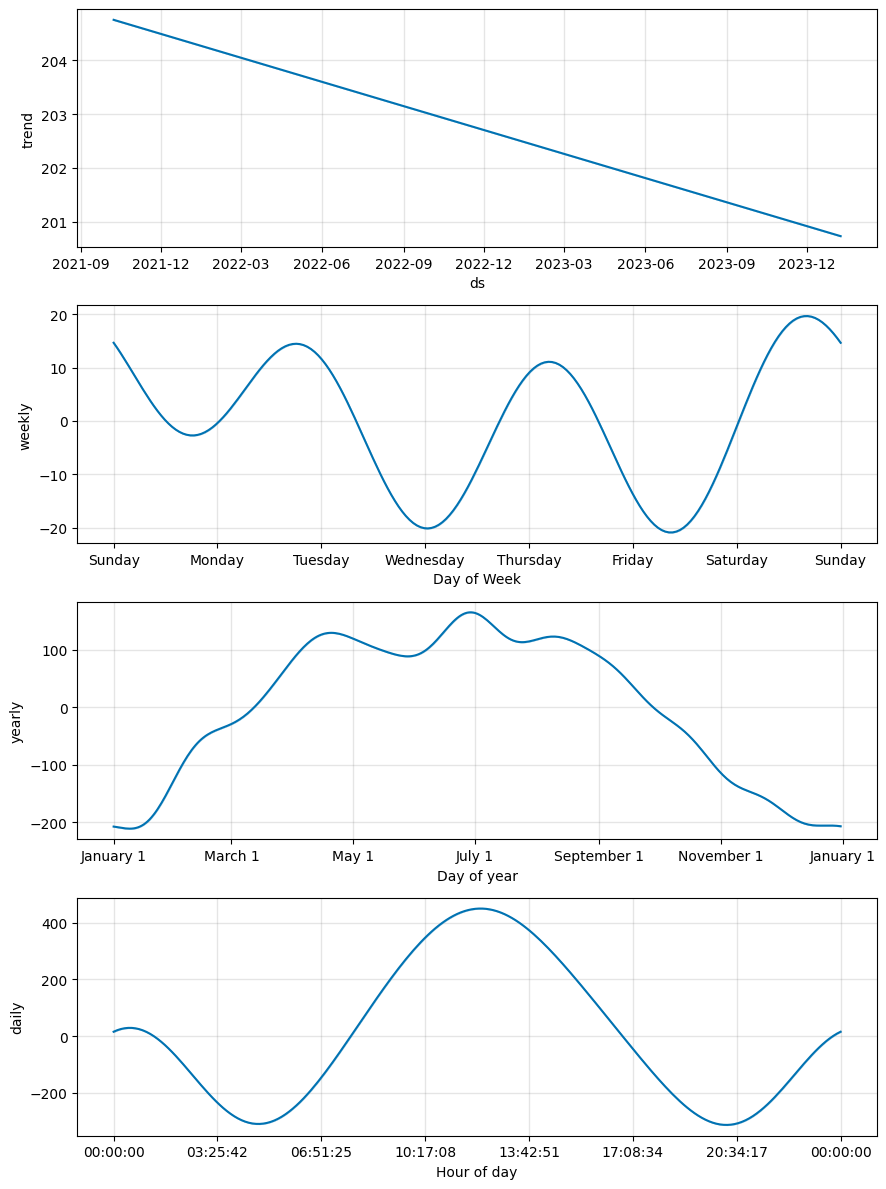

In [58]:
plot6 = m.plot_components(forecast)

In [59]:
df_merge = pd.merge(data_df, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]

In [60]:
# calculate MAE between expected and predicted values for december
y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values
mae_02 = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae_02)

MAE: 115.507


In [61]:
mape_02 = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: %.3f' % mape_02)

MAPE: 11.205


#Rolling Window

If the process is constant over time, an expanding window forecast can provide a more stable and accurate estimate of the model’s parameters. However, if the underlying parameters of the model are changing over time, a rolling window forecast may be more appropriate as it places more emphasis on recent observations and provides estimates that are closer to the true parameters, but with more variance.

In [20]:
from prophet import Prophet
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

# Define the parameter grid for tuning
# Define the parameter grid for tuning
param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'seasonality_prior_scale': [0.01, 0.1],

}

In [21]:
# Create a list of parameter combinations
param_combinations = list(ParameterGrid(param_grid))

# Initialize variables to store the best model and its performance
best_model = None
best_rmse = float('inf')
best_mse = float('inf')

In [24]:
# Set the timestamp column as the index
data_df.set_index('ds', inplace=True)

# Ensure that your data is sorted by timestamp
data_df.sort_index(inplace=True)

min_train_size =2000  # Minimum training data points to start with

# Define lists to store evaluation metrics
all_rmses = []
all_mses = []
all_forecasts = []  # Add this line to store forecasts

In [25]:
data_df = data_df.reset_index()

#DO NOT RUN

In [26]:
for i in range(min_train_size, len(data_df) + 1):
    train = data_df.iloc[:i]
    val = data_df.iloc[i:i + 1]

    # Loop through parameter combinations and evaluate performance
    for params in param_combinations:
        model = Prophet(**params)
        model.fit(train)  # Use your training data

        # Make predictions on the validation set
        #future = model.make_future_dataframe(periods=len(df_validation))
        forecast = model.predict(val)

        # Calculate RMSE on the validation set
        rmse = mean_squared_error(val['y'], forecast['yhat'], squared=False)

        # Calculate evaluation metrics (e.g., MSE or MAE)
        mse = mean_squared_error(val['y'], forecast['yhat'])
        #print(f"Mean Squared Error (MSE): {mse}")

        all_rmses.append(rmse)
        all_mses.append(mse)
        all_forecasts.append(forecast)

        # Check if this model has a lower RMSE
        if rmse < best_rmse and mse < best_mse:
            best_rmse = rmse
            best_mse = mse
            best_model = model

Streaming output truncated to the last 5000 lines.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn0vjq66/f59c4lpt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn0vjq66/bbbfu5fi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27676', 'data', 'file=/tmp/tmpcn0vjq66/f59c4lpt.json', 'init=/tmp/tmpcn0vjq66/bbbfu5fi.json', 'output', 'file=/tmp/tmpcn0vjq66/prophet_modelpare7r69/prophet_model-20231023162727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:27:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to ov

KeyboardInterrupt: ignored

In [28]:
# After the loop, you can calculate additional evaluation metrics if needed
print(f"Best RMSE: {best_rmse}")
print(f"Best MSE: {best_mse}")
print(f"Best Model Parameters: {best_model}")

Best RMSE: 0.02218433413833054
Best MSE: 0.0004921446811610979
Best Model Parameters: <prophet.forecaster.Prophet object at 0x7a3eee411a50>


In [29]:
print("Best Model Parameters:")
print(f"Seasonality Mode: {best_model.seasonality_mode}")
print(f"Seasonality Prior Scale: {best_model.seasonality_prior_scale}")

Best Model Parameters:
Seasonality Mode: additive
Seasonality Prior Scale: 0.1


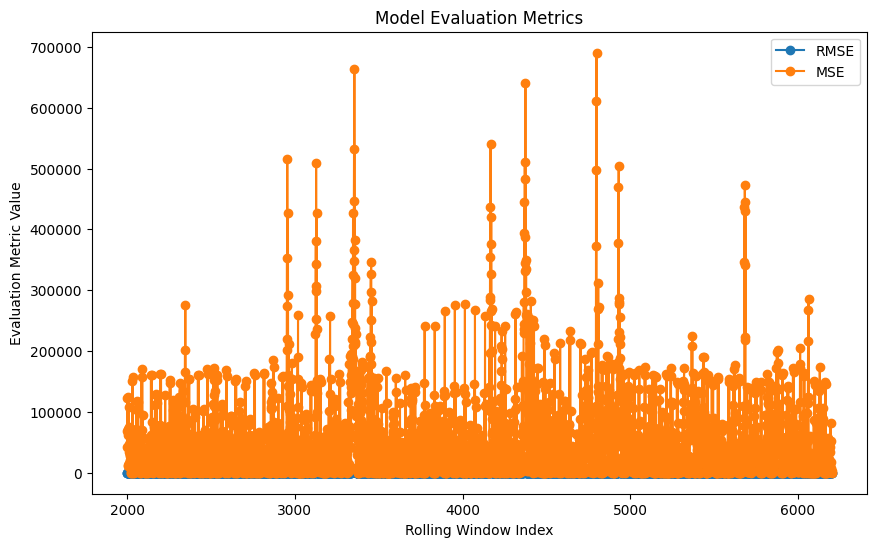

In [30]:
start_index = 2000
end_index = start_index + len(all_mses)

# Create the x values for the plot
x_values = range(start_index, end_index)

# Plot RMSE and MSE
plt.figure(figsize=(10, 6))
plt.plot(x_values,all_rmses, label='RMSE', marker='o')
plt.plot(x_values,all_mses, label='MSE', marker='o')
plt.xlabel('Rolling Window Index')
plt.ylabel('Evaluation Metric Value')
plt.legend()
plt.title('Model Evaluation Metrics')
plt.show()

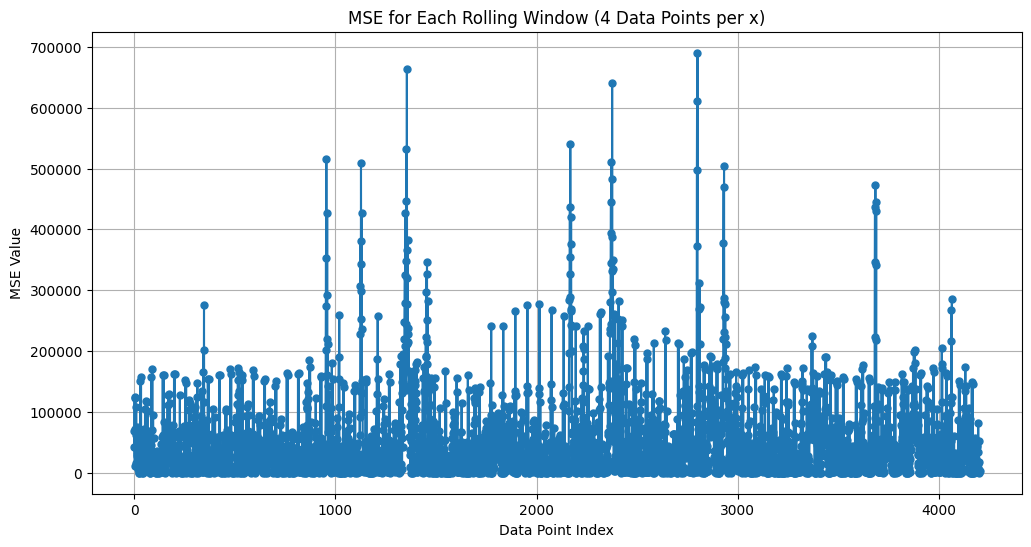

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
x_values = range(0,len(all_mses))  # Adjust the range as needed
mse_values = all_mses  # Replace 'all_mses' with your actual MSE data

# Create lists for repeated values
x_repeated = []
mse_repeated = []

# Repeat each value in x_values four times
#for x, mse in zip(x_values, mse_values):
#    x_repeated.extend([x] * 4)

# Create an array of indices to match the x_values
#indices = np.arange(0, len(x_repeated))

# Plot the repeated data
plt.figure(figsize=(12, 6))
plt.plot(x_values, mse_values, marker='o', linestyle='-', markersize=5)
plt.title('MSE for Each Rolling Window (4 Data Points per x)')
plt.xlabel('Data Point Index')
plt.ylabel('MSE Value')
plt.grid(True)
plt.show()


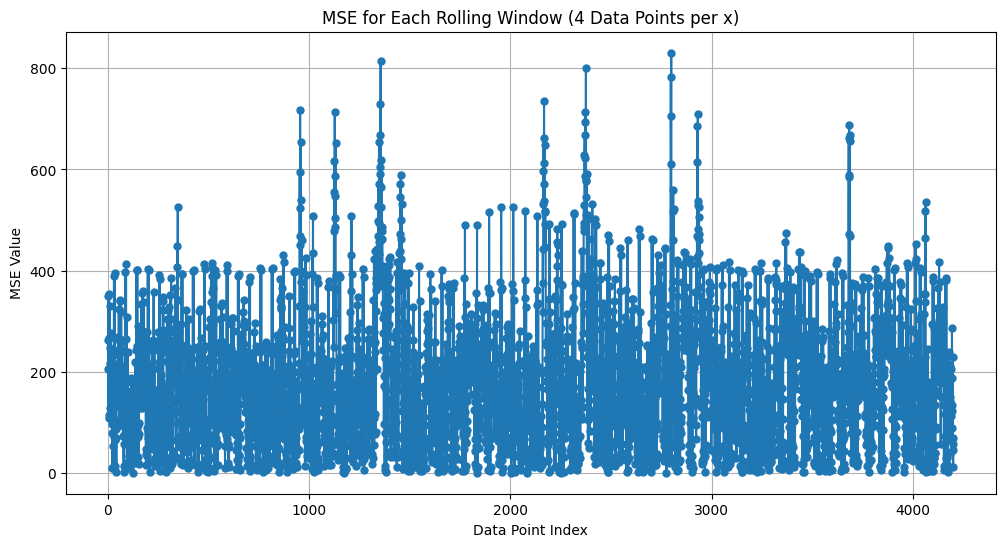

In [50]:
from matplotlib.spines import allow_rasterization
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
x_values = range(0,len(all_mses))  # Adjust the range as needed
rmse_values = all_rmses  # Replace 'all_mses' with your actual MSE data

# Create lists for repeated values
x_repeated = []
mse_repeated = []

# Repeat each value in x_values four times
#for x, mse in zip(x_values, mse_values):
#    x_repeated.extend([x] * 4)

# Create an array of indices to match the x_values
#indices = np.arange(0, len(x_repeated))

# Plot the repeated data
plt.figure(figsize=(12, 6))
plt.plot(x_values, rmse_values, marker='o', linestyle='-', markersize=5)
plt.title('MSE for Each Rolling Window (4 Data Points per x)')
plt.xlabel('Data Point Index')
plt.ylabel('MSE Value')
plt.grid(True)
plt.show()


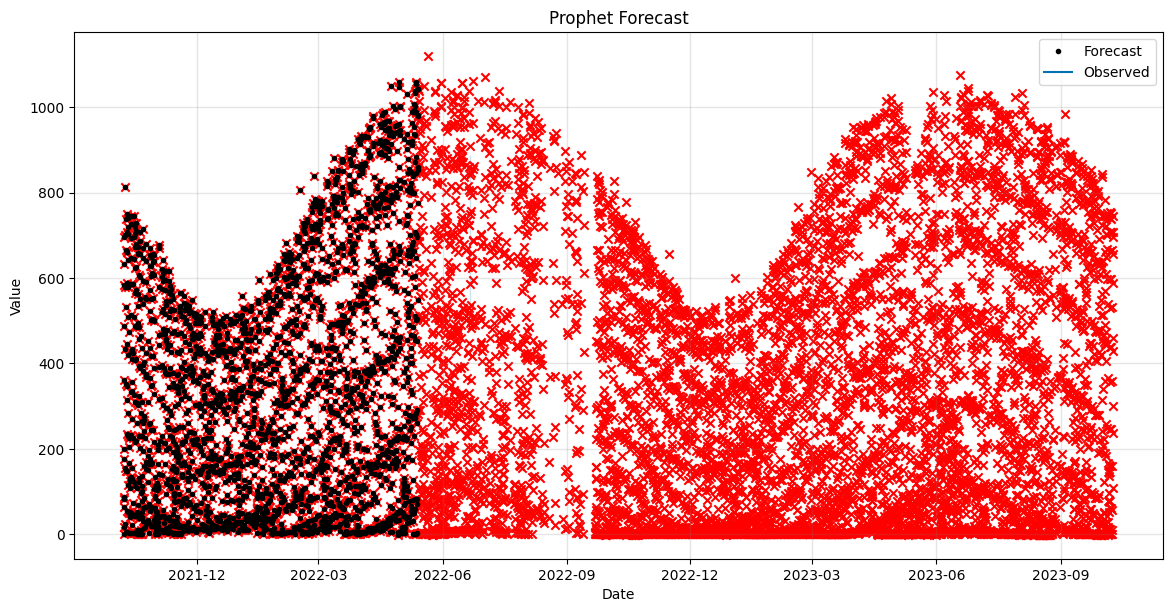

In [61]:
# Plot the forecasted points
fig = best_model.plot(forecast, xlabel='Date', ylabel='Value', figsize=(12, 6))

# Add observed data points
plt.scatter(data_df['ds'], data_df['y'], color='red', label='Observed', marker='x')

# Show the plot
plt.title('Prophet Forecast')

plt.legend(["Forecast", "Observed"])

plt.show()

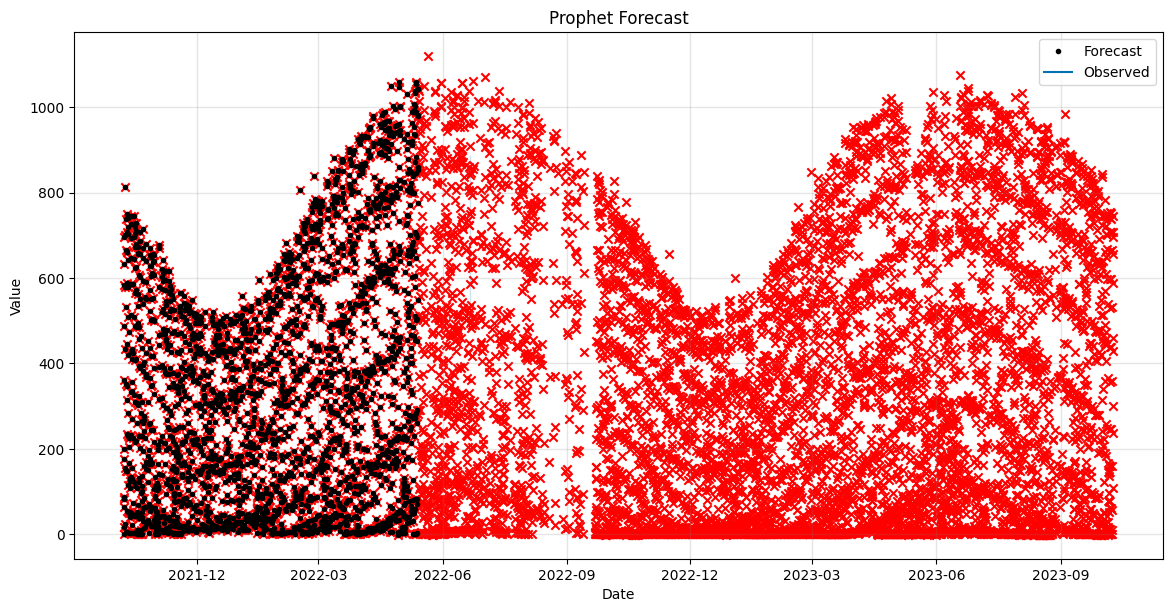

In [85]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot the forecasted points
fig = best_model.plot(forecast, xlabel='Date', ylabel='Value', figsize=(12, 6))

# Add observed data points as a scatter plot with the correct legend label
observed = plt.scatter(data_df['ds'], data_df['y'], color='red', marker='x')

# Set the title
plt.title('Prophet Forecast')

# Add a legend with the correct labels
plt.legend(["Forecast", "Observed"])
# Show the plot
plt.show()
